In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
#from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [2]:
# saving the datasets to individual varaibles

ravdess_dir = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"


In [3]:
crema_dir = "/kaggle/input/cremad/AudioWAV/"
tess_dir = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
savee_dir = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [30]:
# proessing the ravdess dataset  
ravdess_folders = os.listdir(ravdess_dir)
print(f"Ravdess folders: {ravdess_folders}")

emotion_labels_ravdess = []
file_paths_ravdess = []

for folder in ravdess_folders:
    folder_path = os.path.join(ravdess_dir, folder)
   # print(f"Processing folder: {folder_path}")
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
       # print(f"Files in {folder_path}: {files}")
        for file in files:
            full_file_path = os.path.join(folder_path, file)
            if os.path.isfile(full_file_path):
                parts = file.split('.')[0].split('-')
                if len(parts) > 2:
                    emotion_labels_ravdess.append(int(parts[2]))
                    file_paths_ravdess.append(full_file_path)
                else:
                    print(f"Unexpected file name format: {file}")

#create a DataFrame for Ravdess
emotion_df_ravdess = pd.DataFrame(emotion_labels_ravdess, columns=['Emotion'])
path_df_ravdess = pd.DataFrame(file_paths_ravdess, columns=['File Path'])
ravdess_df = pd.concat([emotion_df_ravdess, path_df_ravdess], axis=1)
ravdess_df['Emotion'] = ravdess_df['Emotion'].replace({
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
})
print(ravdess_df.head())

Ravdess folders: ['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']
    Emotion                                          File Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...


In [32]:
# PRocess the crema dataset
crema_files = os.listdir(crema_dir)
# print(f"Crema files: {crema_files}")

emotion_labels_crema = []
file_paths_crema = []

for file in crema_files:
    file_path = os.path.join(crema_dir, file)
    file_paths_crema.append(file_path)
    parts = file.split('_')
    emotion = {
        'SAD': 'sad', 'ANG': 'angry', 'DIS': 'disgust',
        'FEA': 'fear', 'HAP': 'happy', 'NEU': 'neutral'
    }.get(parts[2], 'Unknown')
    emotion_labels_crema.append(emotion)

#create a  DataFrame for Crema
emotion_df_crema = pd.DataFrame(emotion_labels_crema, columns=['Emotion'])
path_df_crema = pd.DataFrame(file_paths_crema, columns=['File Path'])
crema_df = pd.concat([emotion_df_crema, path_df_crema], axis=1)
crema_df.head()

,Emotion,File Path
0,disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


In [6]:
# Process Tess Dataset
tess_folders = os.listdir(tess_dir)
print(f"Tess folders: {tess_folders}")

emotion_labels_tess = []
file_paths_tess = []

for folder in tess_folders:
    files_in_folder = os.listdir(os.path.join(tess_dir, folder))
    for file in files_in_folder:
        parts = file.split('.')[0].split('_')
        emotion = 'surprise' if parts[2] == 'ps' else parts[2]
        emotion_labels_tess.append(emotion)
        file_paths_tess.append(os.path.join(tess_dir, folder, file))

# Create a DataFrame for Tess
emotion_df_tess = pd.DataFrame(emotion_labels_tess, columns=['Emotion'])
path_df_tess = pd.DataFrame(file_paths_tess, columns=['File Path'])
tess_df = pd.concat([emotion_df_tess, path_df_tess], axis=1)
print(tess_df['Emotion'].value_counts())

Tess folders: ['YAF_fear', 'OAF_angry', 'OAF_Fear', 'OAF_disgust', 'OAF_neutral', 'YAF_angry', 'OAF_Sad', 'YAF_disgust', 'YAF_neutral', 'OAF_Pleasant_surprise', 'YAF_happy', 'OAF_happy', 'YAF_sad', 'YAF_pleasant_surprised']
Emotion
fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: count, dtype: int64


In [ ]:
# Process Savee Dataset
savee_files = os.listdir(savee_dir)
#print(f"Savee files: {savee_files}")

emotion_labels_savee = []
file_paths_savee = []

for file in savee_files:
    file_path = os.path.join(savee_dir, file)
    file_paths_savee.append(file_path)
    part = file.split('_')[1]
    emotion_code = part[:-6]
    emotion = {
        'a': 'angry', 'd': 'disgust', 'f': 'fear',
        'h': 'happy', 'n': 'neutral', 'sa': 'sad'
    }.get(emotion_code, 'surprise')
    emotion_labels_savee.append(emotion)

#Create a  DataFrame for Savee
emotion_df_savee = pd.DataFrame(emotion_labels_savee, columns=['Emotion'])
path_df_savee = pd.DataFrame(file_paths_savee, columns=['File Path'])
savee_df = pd.concat([emotion_df_savee, path_df_savee], axis=1)
print(savee_df['Emotion'].value_counts())
savee_df.head()

In [8]:
# Combine All the dataframes into one single dataframe 
combined_df = pd.concat([ravdess_df, crema_df, tess_df, savee_df], axis=0)
combined_df.to_csv("combined_data.csv", index=False)
print(combined_df['Emotion'].value_counts())

Emotion
fear        1923
disgust     1923
happy       1923
sad         1923
angry       1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64


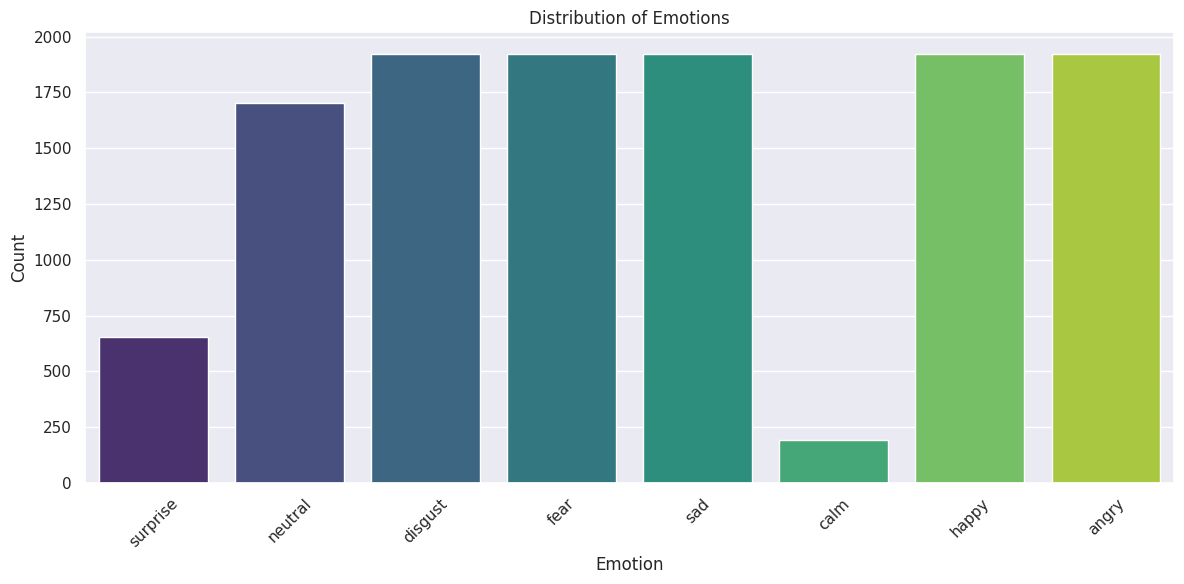

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ebsuring that the column matches 'Emotion'
emotion_column = 'Emotion'  

# Visualize the emotion distribution 
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x=emotion_column, data=combined_df, palette='viridis')

plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


In [10]:
# Loading a sample file using librosa library 
example_audio_path = combined_df['File Path'].iloc[0]  # Replace with the path to your audio file
audio_data, sampling_rate = librosa.load(example_audio_path, sr=None)


In [11]:
# Display sample audio
ipd.Audio(audio_data, rate=sampling_rate)

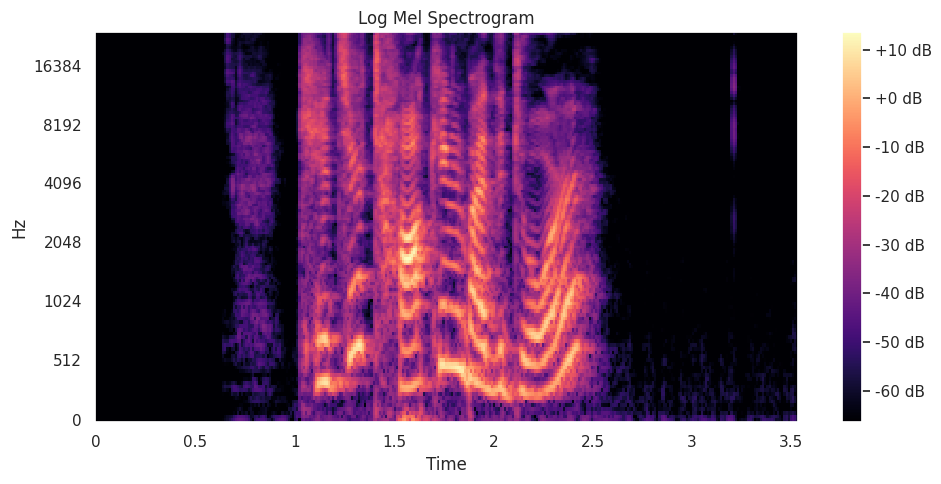

In [12]:
# Create and display Log Mel Spectrogram
plt.figure(figsize=(10, 5))
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate, n_mels=128, fmax=8000)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
librosa.display.specshow(log_mel_spectrogram, y_axis='mel', sr=sampling_rate, x_axis='time')
plt.title('Log Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

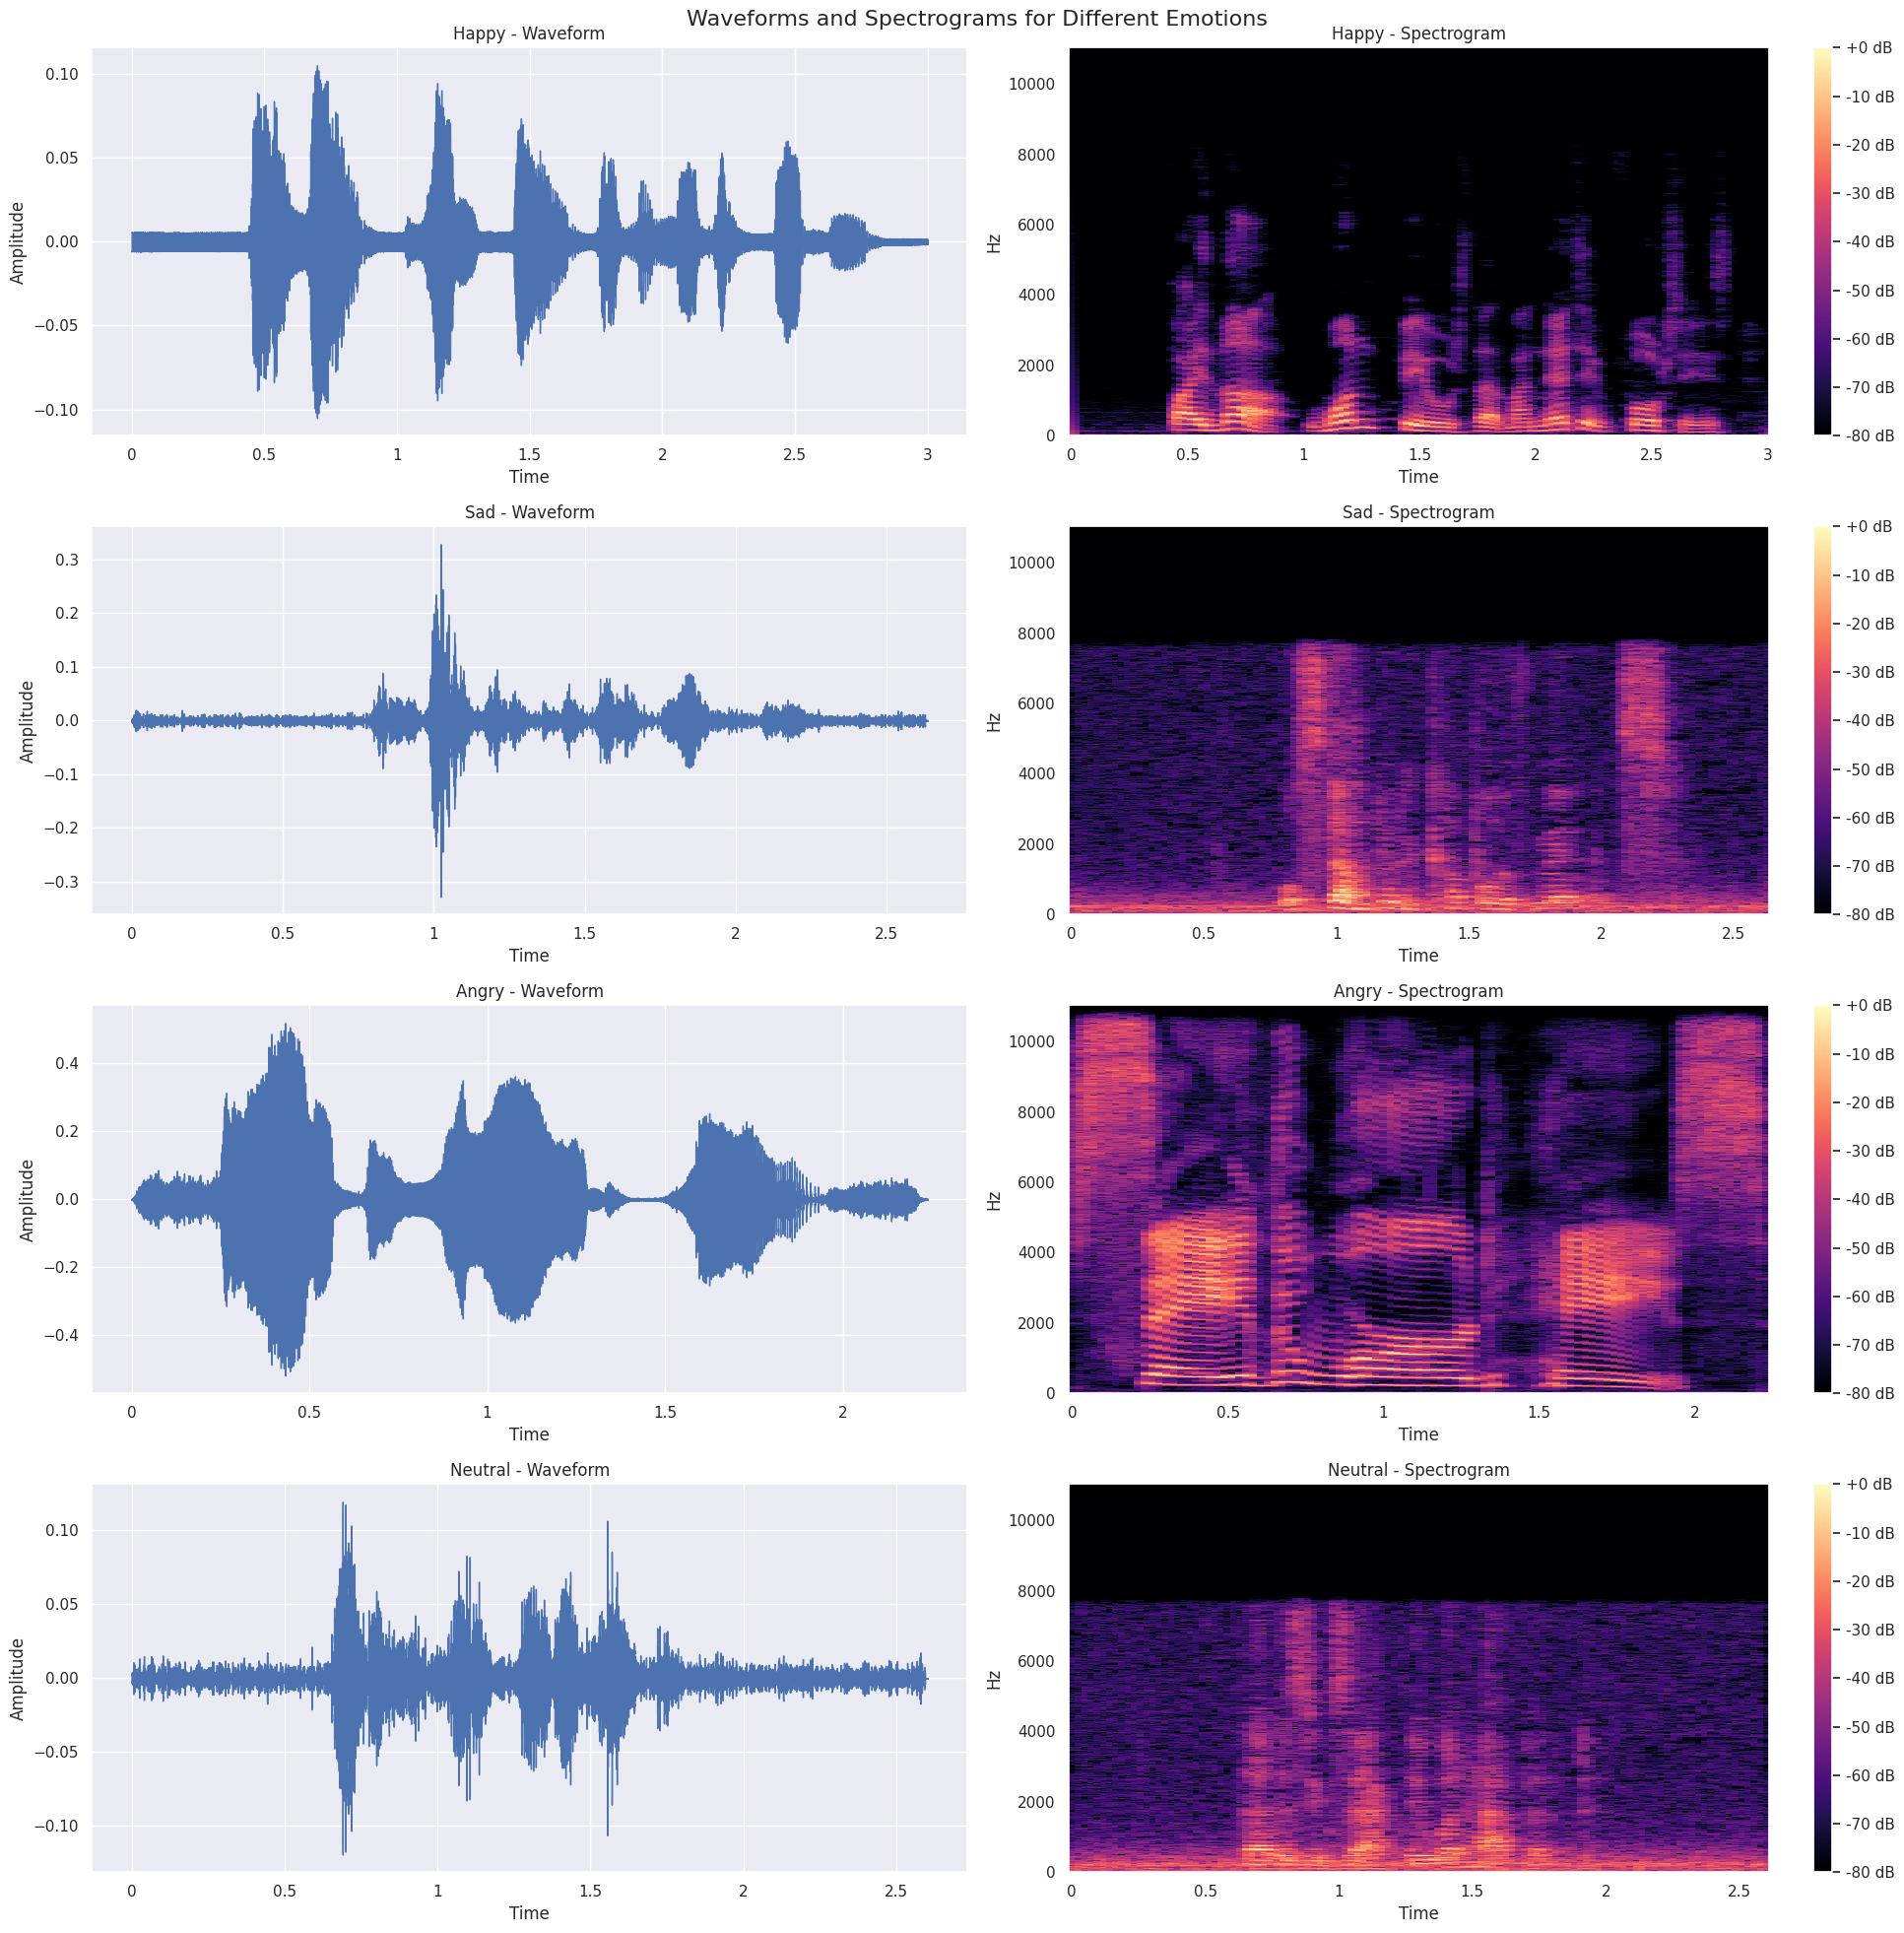

In [13]:
def plot_waveform_and_spectrogram(df, emotions_to_plot, n_samples=1):
    # create a figure with subplots: one row per emoition, two columns (one for waveform, one for spectrogram)
    fig, axes = plt.subplots(len(emotions_to_plot), 2, figsize=(20, 5*len(emotions_to_plot)))
    fig.suptitle('Waveforms and Spectrograms for Different Emotions', fontsize=16)  # Set the main title for the figure

    # Loop through each emotion to be ploted
    for i, emotion in enumerate(emotions_to_plot):
        # ranDomly select 'n_samples' number of file paths from the dataframe for the given emotion
        emotion_samples = df[df['Emotion'] == emotion]['File Path'].sample(n_samples).values

        #lets Loop through the selected samples
        for sample in emotion_samples:
            # Loading  the audio file; limiingt the duration to 3 seconds
            y, sr = librosa.load(sample, duration=3)

            # Plot the waveform in the first column
            axes[i, 0].set_title(f'{emotion.capitalize()} - Waveform')  # Set the title for the waveform plot
            librosa.display.waveshow(y, sr=sr, ax=axes[i, 0])  # Display the waveform
            axes[i, 0].set_xlabel('Time')  
            axes[i, 0].set_ylabel('Amplitude')  

            # Compute the Short-Time Fourier Transform (STFT) to get the spectrogram
            D = librosa.stft(y)
            DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convert amplitude to decibels

            # Plot the spectrogram in the second column
            axes[i, 1].set_title(f'{emotion.capitalize()} - Spectrogram')  # Set the title for the spectrogram plot
            img = librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='hz', ax=axes[i, 1])  # Display the spectrogram
            fig.colorbar(img, ax=axes[i, 1], format='%+2.0f dB')  

    # Adjust layout to prevent overlapping and show the plots
    plt.tight_layout()
    plt.show()

# Visualization
emotions_to_visualize = ['happy', 'sad', 'angry', 'neutral']
plot_waveform_and_spectrogram(combined_df, emotions_to_visualize)


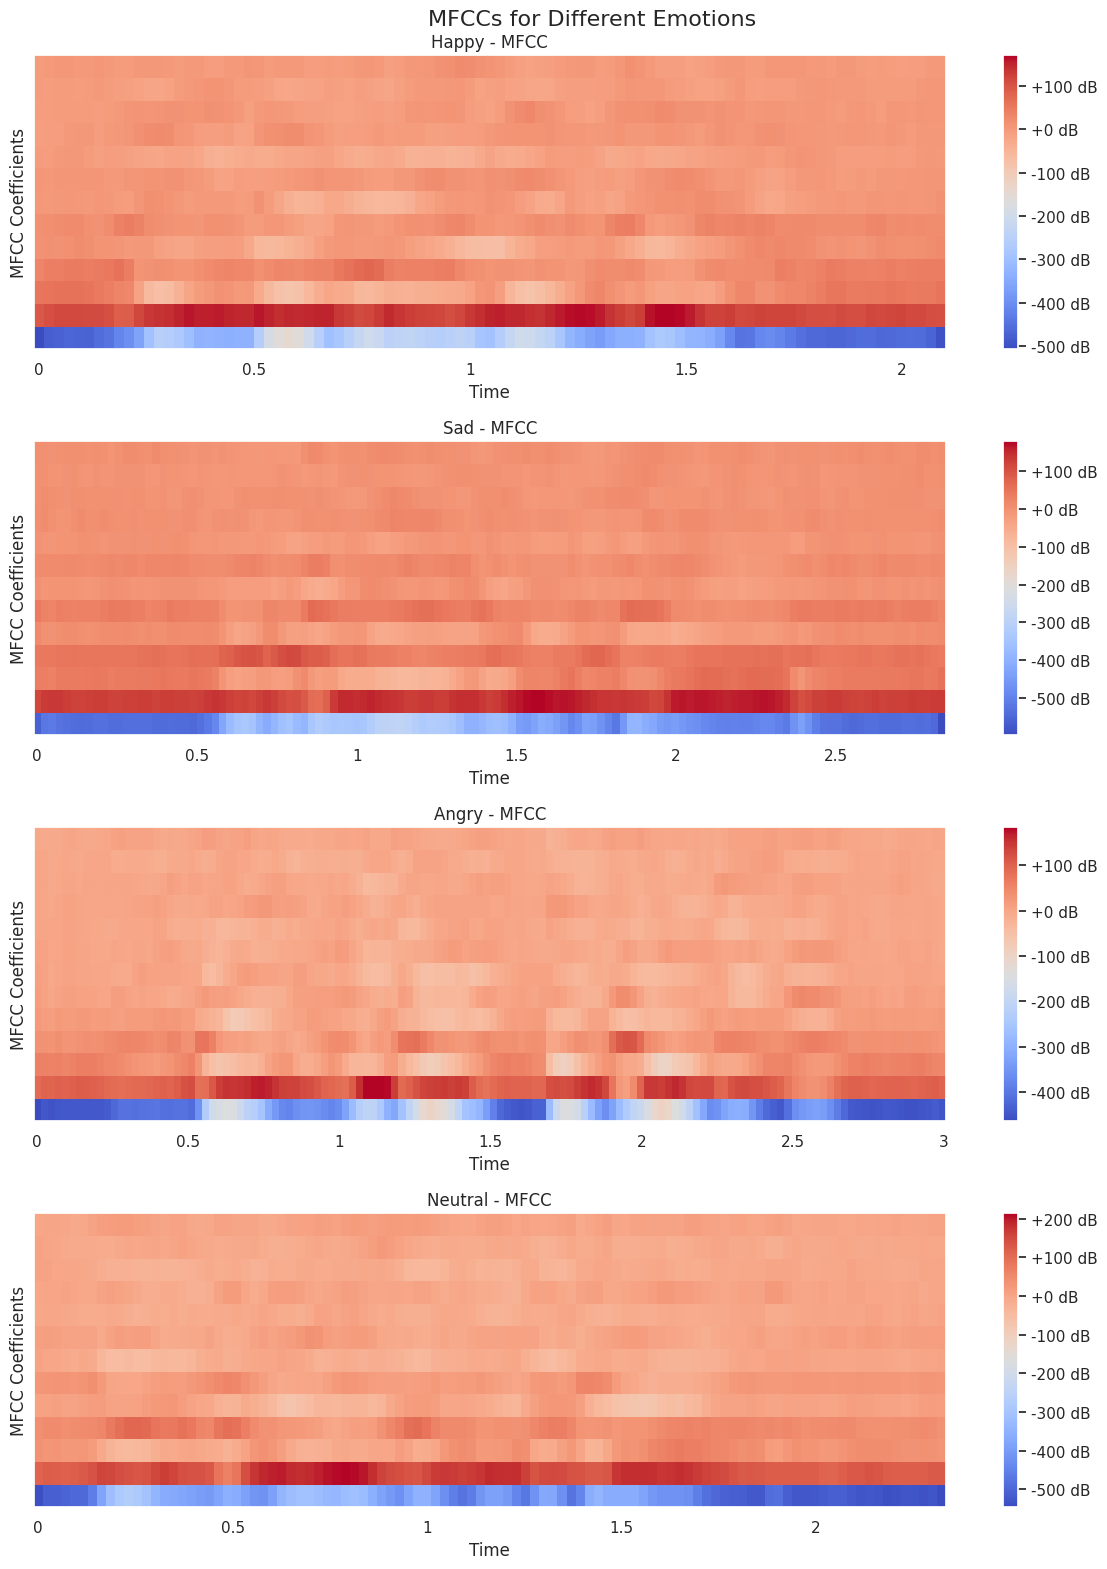

In [14]:
def plot_mfcc_for_emotions(df, emotions_to_plot, n_samples=1, n_mfcc=13):
    fig, axes = plt.subplots(len(emotions_to_plot), 1, figsize=(12, 4*len(emotions_to_plot)))
    fig.suptitle('MFCCs for Different Emotions', fontsize=16)

    for i, emotion in enumerate(emotions_to_plot):
        # Select random samples for the emotion
        emotion_samples = df[df['Emotion'] == emotion]['File Path'].sample(n_samples).values

        for sample in emotion_samples:
            # Load audio file
            y, sr = librosa.load(sample, duration=3)

            # Compute MFCCs
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

            # Plot MFCCs
            img = librosa.display.specshow(mfccs, x_axis='time', ax=axes[i])
            axes[i].set_title(f'{emotion.capitalize()} - MFCC')
            axes[i].set_xlabel('Time')
            axes[i].set_ylabel('MFCC Coefficients')
            fig.colorbar(img, ax=axes[i], format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

# Example usage:
emotions_to_visualize = ['happy', 'sad', 'angry', 'neutral']
plot_mfcc_for_emotions(combined_df, emotions_to_visualize)

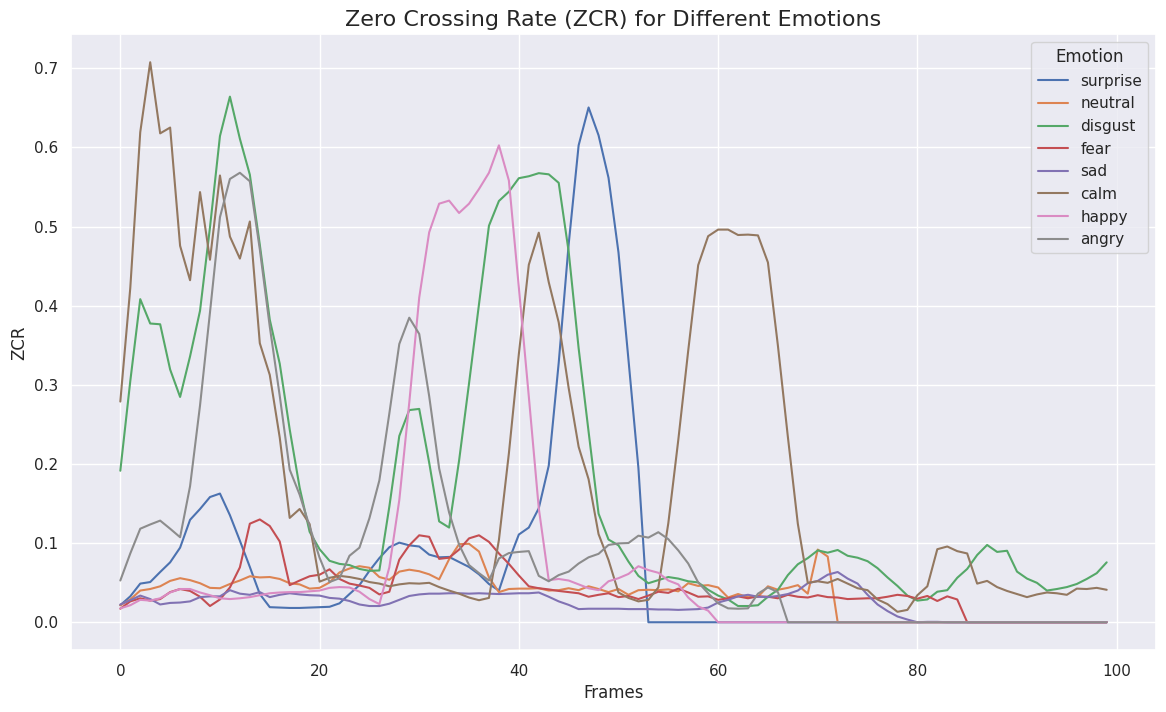

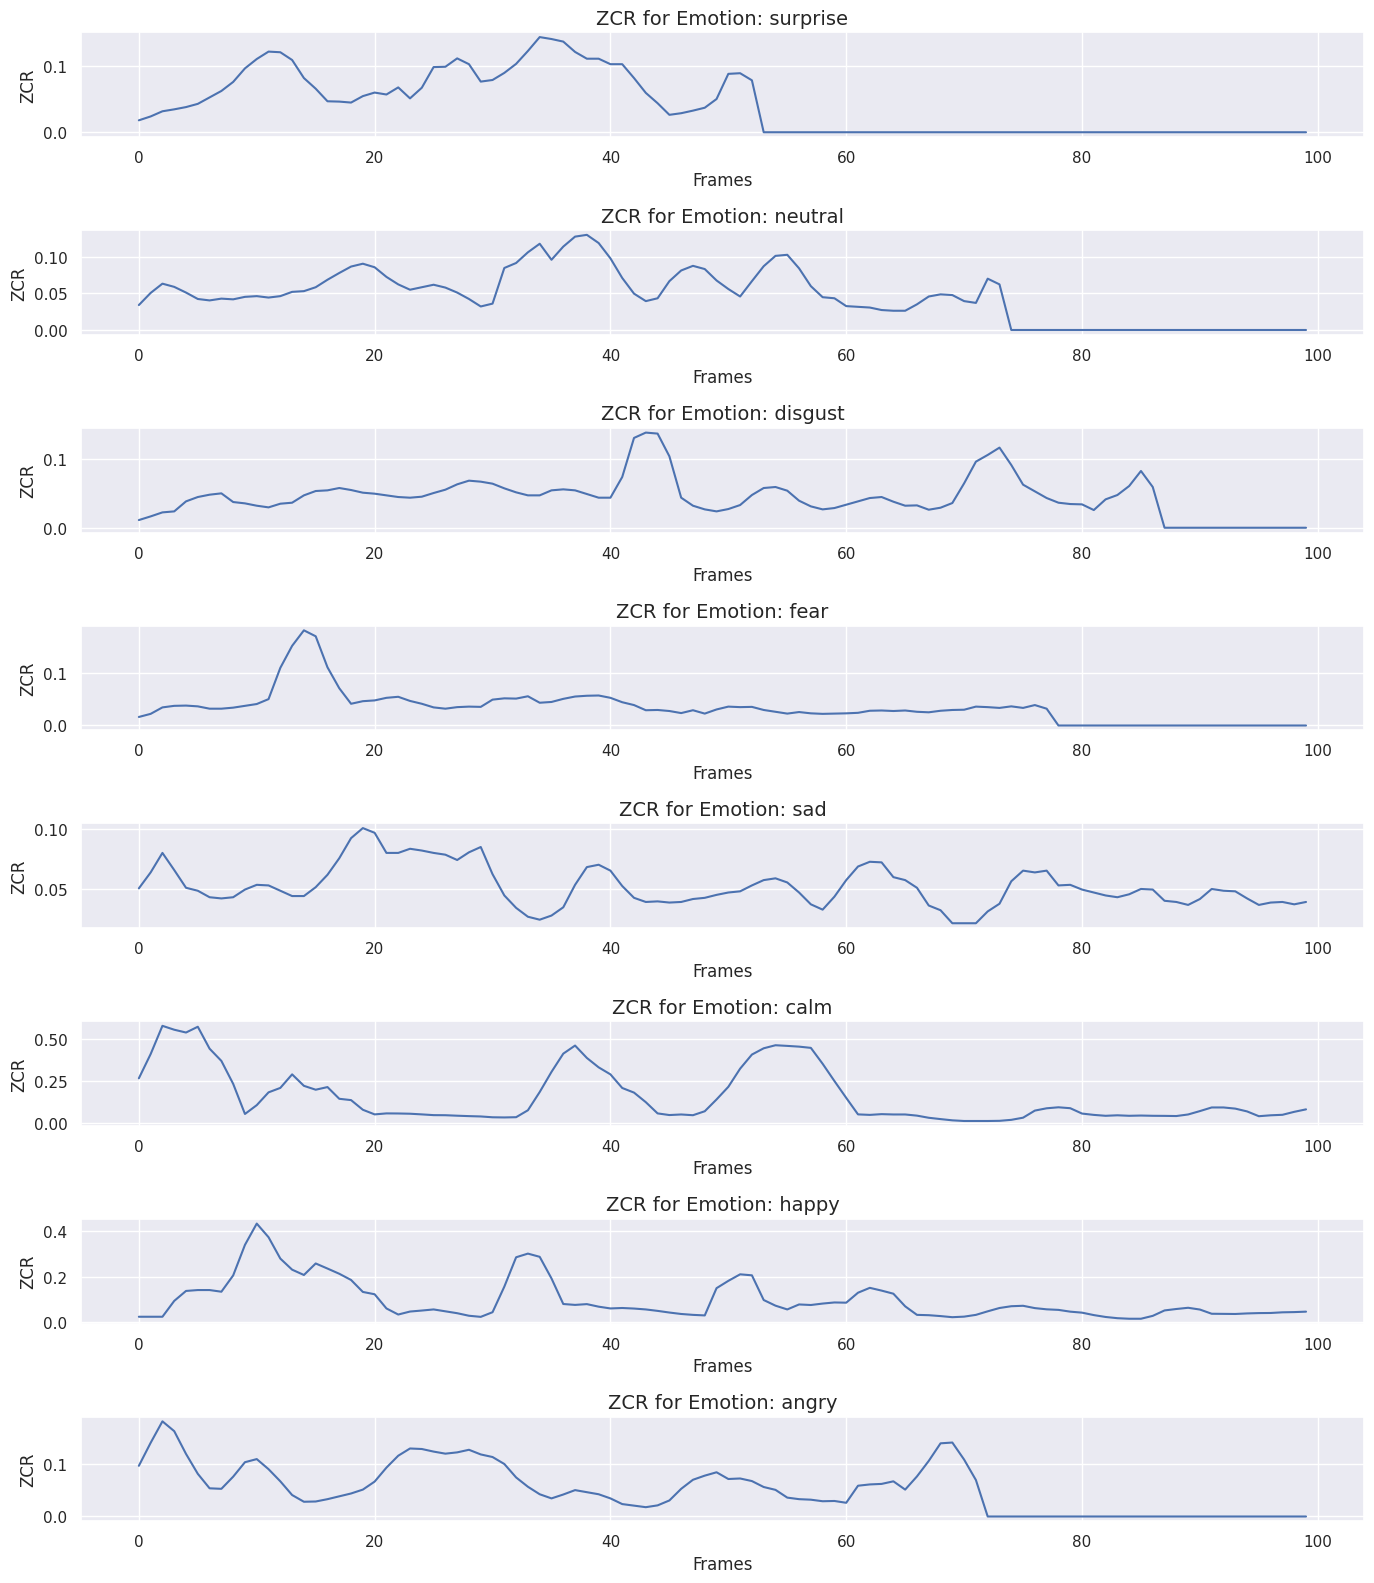

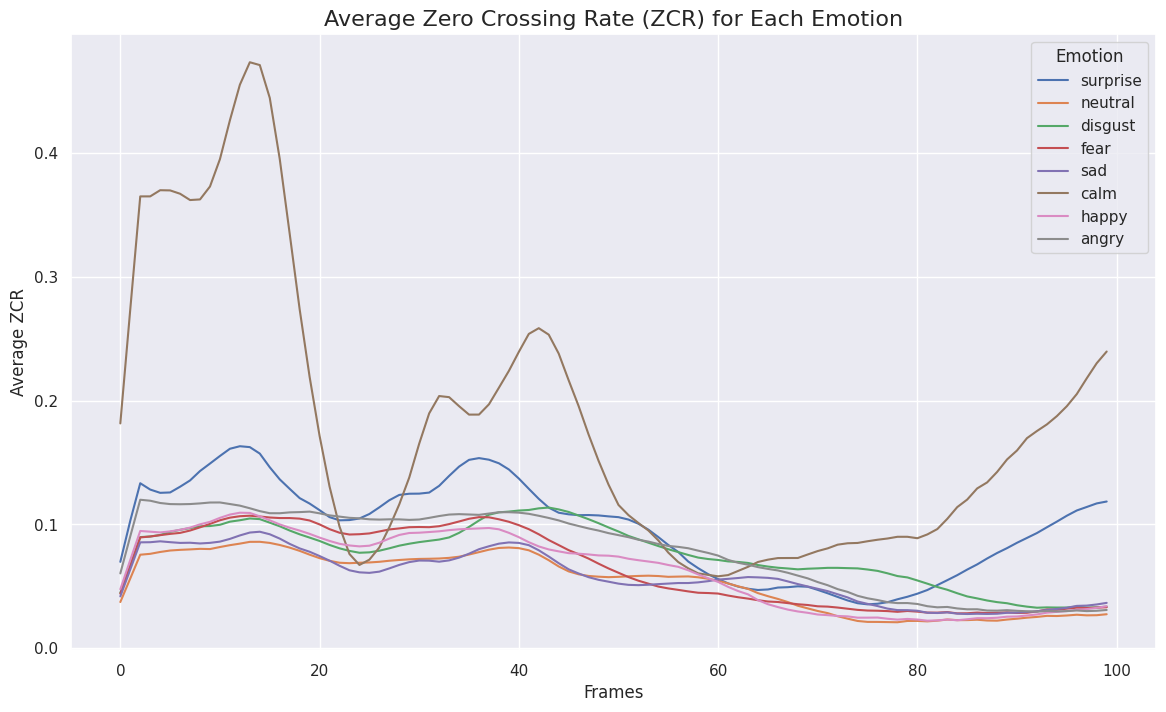

In [15]:
import random
def visualize_zcr_for_emotions(data_path):
    # Initialize a dictionary to hold ZCRs for each emotion
    emotion_zcrs = {emotion: [] for emotion in data_path['Emotion'].unique()}

    # Set a fixed length for ZCR arrays
    fixed_length = 100  

    # Calculate ZCR for each audio file and store in the corresponding emotion list
    for _, row in data_path.iterrows():
        path, emotion = row['File Path'], row['Emotion']
        data, sr = librosa.load(path, duration=2.5, offset=0.6)
        zcr_values = librosa.feature.zero_crossing_rate(data, frame_length=2048, hop_length=512)[0]

        # If ZCR length is less than the fixed length, pad with zeros; if more, truncate
        if len(zcr_values) < fixed_length:
            zcr_values = np.pad(zcr_values, (0, fixed_length - len(zcr_values)), 'constant')
        else:
            zcr_values = zcr_values[:fixed_length]
        
        emotion_zcrs[emotion].append(zcr_values)

    # 1. Plot ZCR for a randomly selected sample of each emotion
    plt.figure(figsize=(14, 8))
    for emotion, zcr_list in emotion_zcrs.items():
        random_zcr = random.choice(zcr_list)
        plt.plot(random_zcr, label=emotion)
    plt.title('Zero Crossing Rate (ZCR) for Different Emotions', size=16)
    plt.xlabel('Frames')
    plt.ylabel('ZCR')
    plt.legend(title='Emotion')
    plt.show()

    # 2. Plot ZCR for each emotion in separate subplots
    num_emotions = len(emotion_zcrs)
    fig, axes = plt.subplots(nrows=num_emotions, ncols=1, figsize=(14, 2*num_emotions))
    for ax, (emotion, zcr_list) in zip(axes, emotion_zcrs.items()):
        random_zcr = random.choice(zcr_list)
        ax.plot(random_zcr)
        ax.set_title(f'ZCR for Emotion: {emotion}', size=14)
        ax.set_xlabel('Frames')
        ax.set_ylabel('ZCR')
    plt.tight_layout()
    plt.show()

    # 3. Plot average ZCR for each emotion
    average_zcrs = {emotion: np.mean(zcrs, axis=0) for emotion, zcrs in emotion_zcrs.items()}
    plt.figure(figsize=(14, 8))
    for emotion, avg_zcr in average_zcrs.items():
        plt.plot(avg_zcr, label=emotion)
    plt.title('Average Zero Crossing Rate (ZCR) for Each Emotion', size=16)
    plt.xlabel('Frames')
    plt.ylabel('Average ZCR')
    plt.legend(title='Emotion')
    plt.show()

# Example usage:
visualize_zcr_for_emotions(combined_df)

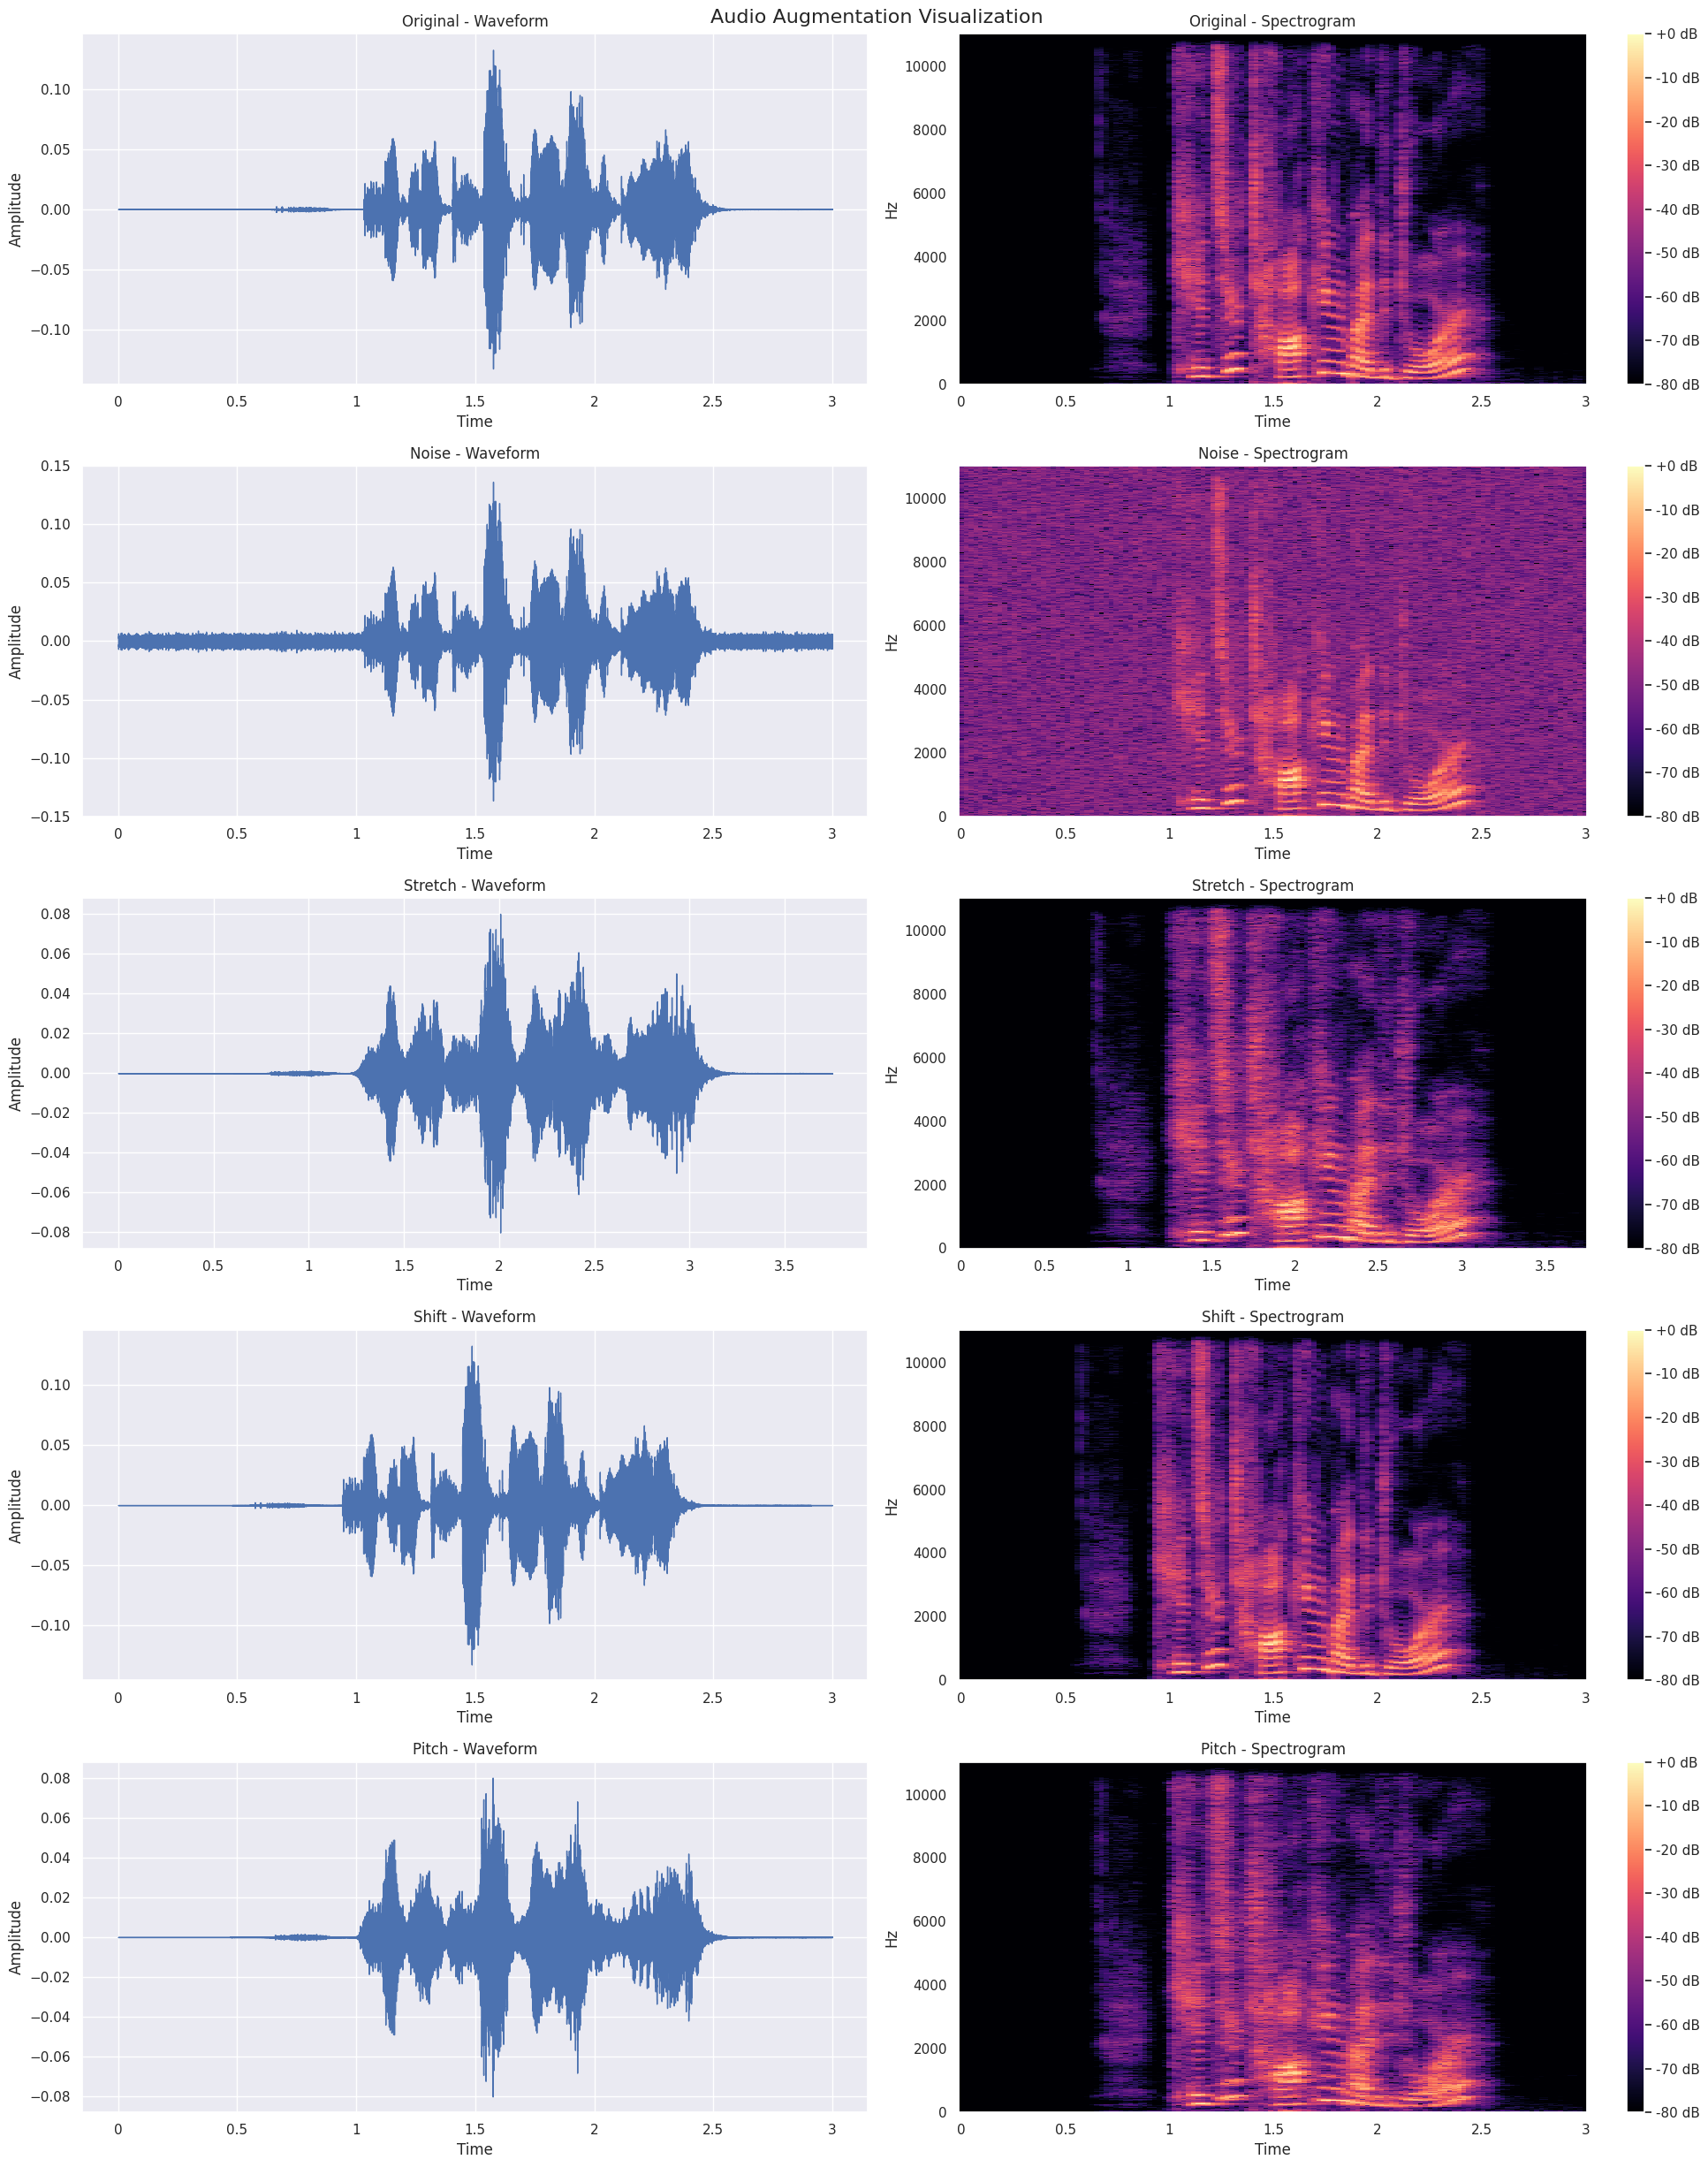

In [16]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

def plot_augmentations(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, duration=3)

    # Create augmented versions
    y_noise = noise(y)
    y_stretch = librosa.effects.time_stretch(y,rate=0.8)
    y_shift = shift(y)
    y_pitch = pitch(y, sr)

    # Prepare the plot
    fig, axes = plt.subplots(5, 2, figsize=(20, 25))
    fig.suptitle('Audio Augmentation Visualization', fontsize=16)

    signals = [
        ('Original', y),
        ('Noise', y_noise),
        ('Stretch', y_stretch),
        ('Shift', y_shift),
        ('Pitch', y_pitch)
    ]

    for i, (title, signal) in enumerate(signals):
        # Plot waveform
        librosa.display.waveshow(signal, sr=sr, ax=axes[i, 0])
        axes[i, 0].set_title(f'{title} - Waveform')
        axes[i, 0].set_xlabel('Time')
        axes[i, 0].set_ylabel('Amplitude')

        # Plot spectrogram
        D = librosa.stft(signal)
        DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        img = librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='hz', ax=axes[i, 1])
        axes[i, 1].set_title(f'{title} - Spectrogram')
        fig.colorbar(img, ax=axes[i, 1], format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

# Example usage:
example_file = combined_df['File Path'].iloc[0]  # change index to change sample file
plot_augmentations(example_file)

In [17]:
def zero_cross(signal, frame_size=2048, hop_size=512):
    zc = librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_size)
    return np.squeeze(zc)

def root_mean_square(signal, frame_size=2048, hop_size=512):
    rms = librosa.feature.rms(y=signal, frame_length=frame_size, hop_length=hop_size)
    return np.squeeze(rms)

def mel_freq_cepstral_coeff(signal, sample_rate=22050, frame_size=2048, hop_size=512, flatten: bool = True):
    mel_coeff = librosa.feature.mfcc(y=signal, sr=sample_rate)
    return np.squeeze(mel_coeff.T) if not flatten else np.ravel(mel_coeff.T)

def compute_features(signal, sample_rate=22050, frame_size=2048, hop_size=512):
    feature_vector = np.array([])

    feature_vector = np.hstack((feature_vector,
                                zero_cross(signal, frame_size, hop_size),
                                root_mean_square(signal, frame_size, hop_size),
                                mel_freq_cepstral_coeff(signal, sample_rate, frame_size, hop_size)
                                ))
    return feature_vector

def extract_audio_features(file_path, clip_duration=2.5, start_offset=0.6):
    signal, sample_rate = librosa.load(file_path, duration=clip_duration, offset=start_offset)
    features = compute_features(signal)
    feature_array = np.array(features)

    noisy_signal = noise(signal)
    noisy_features = compute_features(noisy_signal)
    feature_array = np.vstack((feature_array, noisy_features))

    shifted_signal = pitch(signal, sample_rate)
    shifted_features = compute_features(shifted_signal)
    feature_array = np.vstack((feature_array, shifted_features))

    shifted_signal2 = pitch(signal, sample_rate)
    noisy_shifted_signal = noise(shifted_signal2)
    noisy_shifted_features = compute_features(noisy_shifted_signal)
    feature_array = np.vstack((feature_array, noisy_shifted_features))

    return feature_array

In [18]:
def extract_and_augment_features(audio_path, label):
    base_features = extract_audio_features(audio_path)
    feature_list = []
    label_list = []
    for feature_set in base_features:
        feature_list.append(feature_set)
        label_list.append(label)
    return feature_list, label_list
def parallel_feature_extraction(audio_paths, labels):
    start_time = timeit.default_timer()
    
    results = Parallel(n_jobs=-1)(delayed(extract_and_augment_features)(path, label) 
                                  for (path, label) in zip(audio_paths, labels))
    
    all_features = []
    all_labels = []
    for result in results:
        features, labels = result
        all_features.extend(features)
        all_labels.extend(labels)
    
    end_time = timeit.default_timer()
    print(f'Processing Time: {end_time - start_time:.2f} seconds')
    
    return all_features, all_labels
def prepare_data(audio_dataset):
    # Check and print column names
    print("Available columns:", audio_dataset.columns.tolist())
    
    # Try to identify the correct column names
    path_column = next((col for col in audio_dataset.columns if 'path' in col.lower()), None)
    emotion_column = next((col for col in audio_dataset.columns if 'emotion' in col.lower()), None)
    
    if not path_column or not emotion_column:
        raise ValueError("Could not identify 'Path' and 'Emotion' columns. Please check your DataFrame.")
    
    print(f"Using '{path_column}' as the path column and '{emotion_column}' as the emotion column.")
    
    audio_paths = audio_dataset[path_column]
    labels = audio_dataset[emotion_column]
    
    features, labels = parallel_feature_extraction(audio_paths, labels)
    
    data_frame = pd.DataFrame(features)
    data_frame['Label'] = labels
    
    data_frame.to_csv('/kaggle/working/processed_audio_data.csv', index=False)
    return data_frame
def preprocess_data(data_frame):
    data_frame = data_frame.fillna(0)
    
    features = data_frame.iloc[:, :-1].values
    labels = data_frame['Label'].values
    
    label_encoder = OneHotEncoder()
    encoded_labels = label_encoder.fit_transform(labels.reshape(-1, 1)).toarray()
    
    feature_scaler = StandardScaler()
    scaled_features = feature_scaler.fit_transform(features)
    
    return scaled_features, encoded_labels
def split_data(features, labels, test_ratio=0.2, random_seed=42):
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, test_size=test_ratio, random_state=random_seed, shuffle=True
    )
    
    return train_features, test_features, train_labels, test_labels

def reshape_for_lstm(features):
    return features.reshape(features.shape[0], features.shape[1], 1)

In [19]:
import timeit
from joblib import Parallel, delayed
# Main execution
audio_dataset = pd.read_csv('combined_data.csv')  
processed_data = prepare_data(audio_dataset)

features, labels = preprocess_data(processed_data)

train_features, test_features, train_labels, test_labels = split_data(features, labels)

train_features_3d = reshape_for_lstm(train_features)
test_features_3d = reshape_for_lstm(test_features)

print("Shapes:")
print(f"Train features: {train_features_3d.shape}")
print(f"Train labels: {train_labels.shape}")
print(f"Test features: {test_features_3d.shape}")
print(f"Test labels: {test_labels.shape}")

Available columns: ['Emotion', 'File Path']
Using 'File Path' as the path column and 'Emotion' as the emotion column.
Processing Time: 615.24 seconds
Shapes:
Train features: (38918, 2376, 1)
Train labels: (38918, 8)
Test features: (9730, 2376, 1)
Test labels: (9730, 8)


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [21]:
import pandas as pd
# Load the processed data
processed_data = pd.read_csv('processed_audio_data.csv')

# Handle missing values if any
processed_data = processed_data.fillna(0)

# Separate features and labels
X = processed_data.drop('Label', axis=1).values
y = processed_data['Label'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Save the label encoder for future use
joblib.dump(label_encoder, 'label_encoder.pkl')

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for future use
joblib.dump(scaler, 'feature_scaler.pkl')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

# Reshape data for CNN input
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (38918, 2376, 1)
Training labels shape: (38918, 8)
Testing data shape: (9730, 2376, 1)
Testing labels shape: (9730, 8)


In [22]:
# Define the CNN model architecture
model = models.Sequential([
    layers.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=5, strides=2, padding='same'),
    
    layers.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=5, strides=2, padding='same'),
    layers.Dropout(0.2),
    
    layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=5, strides=2, padding='same'),
    
    layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=5, strides=2, padding='same'),
    layers.Dropout(0.2),
    
    layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=3, strides=2, padding='same'),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(y_categorical.shape[1], activation='softmax')
])

In [23]:
# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-5,
    verbose=1
)

model_checkpoint = callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             

 Total params: 7,193,736 (27.44 MB)

 Trainable params: 7,189,384 (27.43 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [24]:

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

Epoch 1/50


I0000 00:00:1725083301.047727     157 service.cc:145] XLA service 0x79defc01bf20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725083301.047790     157 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/609 ━━━━━━━━━━━━━━━━━━━━ 3:11:24 19s/step - accuracy: 0.2031 - loss: 2.7158

I0000 00:00:1725083315.273599     157 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.3879 - loss: 1.7693
Epoch 1: val_accuracy improved from -inf to 0.46136, saving model to best_model.keras
609/609 ━━━━━━━━━━━━━━━━━━━━ 111s 152ms/step - accuracy: 0.3880 - loss: 1.7688 - val_accuracy: 0.4614 - val_loss: 1.3685 - learning_rate: 0.0010
Epoch 2/50
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5433 - loss: 1.1924
Epoch 2: val_accuracy improved from 0.46136 to 0.54481, saving model to best_model.keras
609/609 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.5434 - loss: 1.1922 - val_accuracy: 0.5448 - val_loss: 1.1923 - learning_rate: 0.0010
Epoch 3/50
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6064 - loss: 1.0241
Epoch 3: val_accuracy improved from 0.54481 to 0.54789, saving model to best_model.keras
609/609 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.6064 - loss: 1.0241 - val_accuracy: 0.5479 - val_loss: 1.1753 - learning_rate: 0.0010
Epoch 4/50
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/s

305/305 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9817 - loss: 0.0657
Test Accuracy: 98.23%


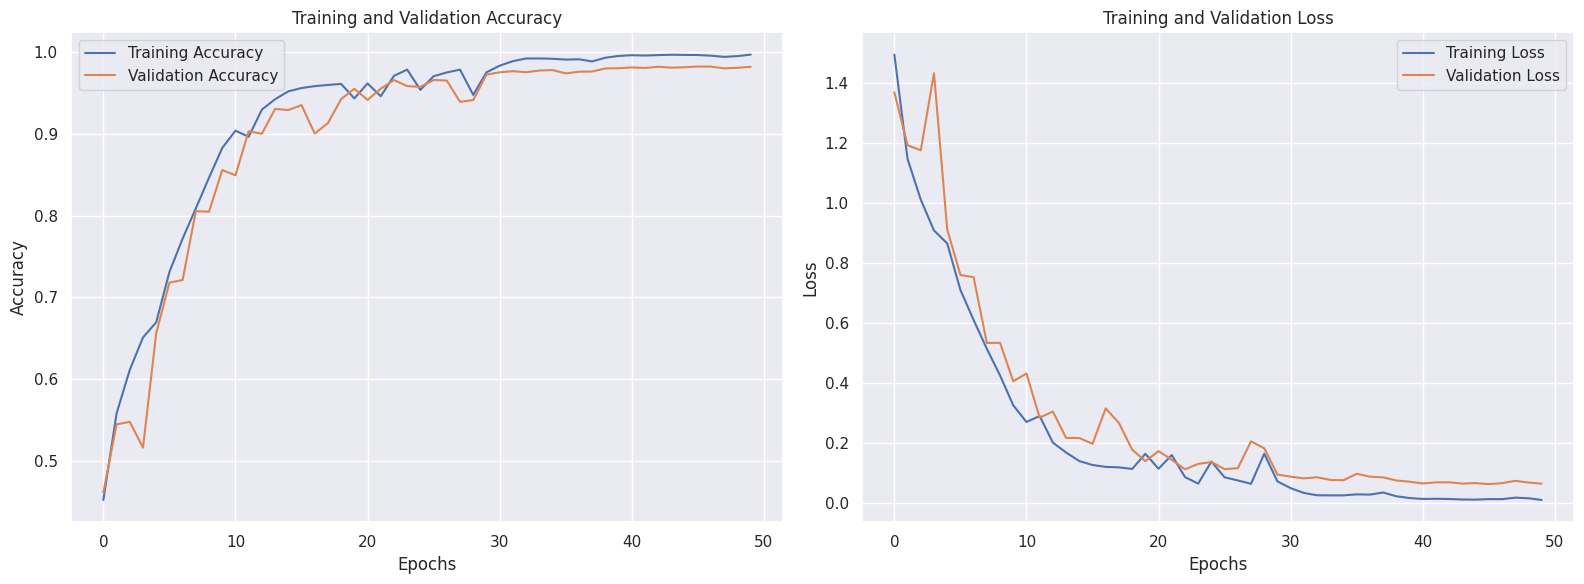

In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation accuracy/loss
epochs_ran = len(history.history['accuracy'])

plt.figure(figsize=(16, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs_ran), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs_ran), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs_ran), history.history['loss'], label='Training Loss')
plt.plot(range(epochs_ran), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
     Predicted Label Actual Label
4498         disgust      disgust
7                sad          sad
2021            fear         fear
4833            fear         fear
3244             sad          sad
3355         disgust      disgust
2180            calm         calm
445            happy        happy
7194         disgust      disgust
1236           angry        angry
Classification Report:
              precision    recall  f1-score   support

       angry       0.98      0.98      0.98      1538
        calm       0.97      0.95      0.96       154
     disgust       0.98      0.98      0.98      1539
        fear       0.98      0.99      0.98      1538
       happy       0.98      0.98      0.98      1538
     neutral       0.98      0.99      0.98      1362
         sad       0.99      0.98      0.98      1539
    surprise       0.99      0.99      0.99       522

    accuracy                           0.98      9730
   macro avg       

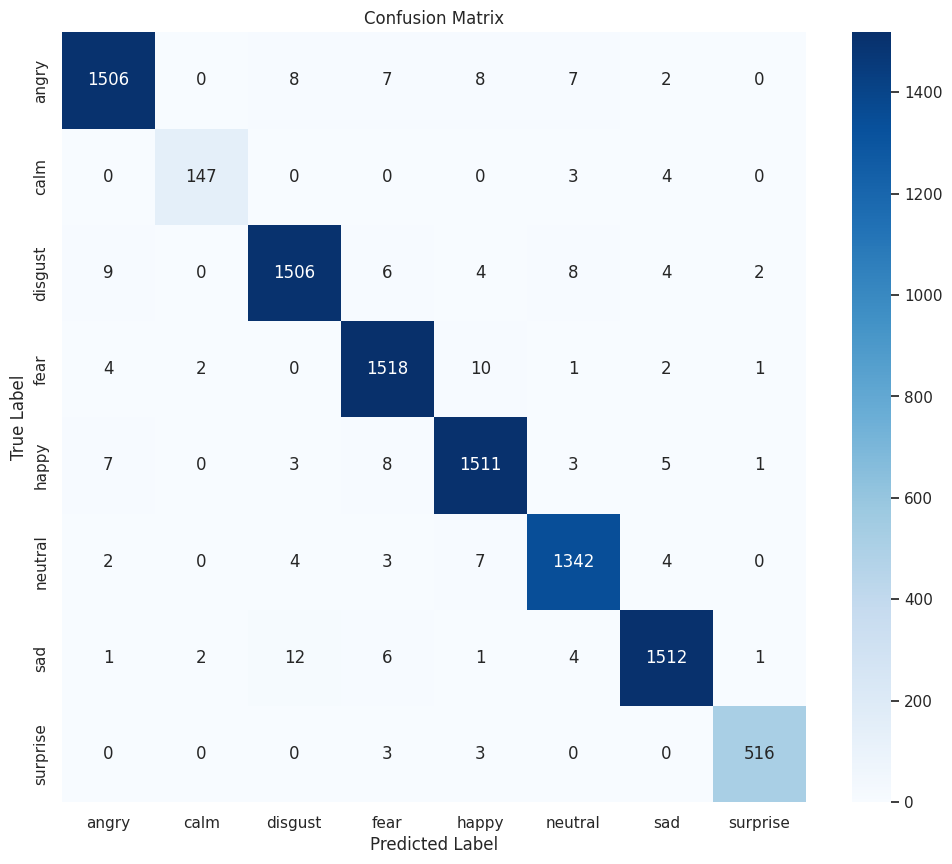

In [29]:
# Load the best saved model
best_model = models.load_model('best_model.keras')

# Predict on test data
y_pred = best_model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
y_true_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Create a DataFrame with predictions and actual labels
results_df = pd.DataFrame({
    'Predicted Label': y_pred_labels,
    'Actual Label': y_true_labels
})

# Display sample predictions
print(results_df.sample(10))

# Classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
